<a href="https://nbviewer.jupyter.org/github/phelantomas/StackSurvey/blob/master/Notebooks/Home_Page.ipynb">Back Home</a>

<img src="https://i.imgur.com/36sp6u2.png" align="middle">

<img src="https://cdn.sstatic.net/Sites/stackoverflow/company/img/logos/so/so-logo.png" style="width:400px;height:80px;" align="middle">
<h1><font color="orange">Stackoverflow Survey 2017 Data Analysis</font></h1>

Goal 3:

The third goal is to investigate, based on gender, years programming, education and current employment status, what the attitude of a developer is towards the learning and utilization of a new language and/or technology.

This will illustrate if tenure in the industry, and employment, or lack thereof is a potentially contributing factor to an individual’s propensity or willingness to accept and learn a new technology or languages, or refuse to change their loyalties.

This finding could be useful information during the hiring process for employers whose businesses use a technology different to a candidate’s discipline.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.plotly as py
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
from sklearn.metrics import mean_squared_error, r2_score
import pycountry
import operator
%matplotlib inline 

dataSurvey = pd.read_csv('C:/Users/Thomas/Desktop/StackOverFlow/survey_results_public.csv')

In [2]:
dataSurvey['LearningNewTech'].unique()

array(['Agree', nan, 'Strongly agree', 'Somewhat agree', 'Disagree',
       'Strongly disagree'], dtype=object)

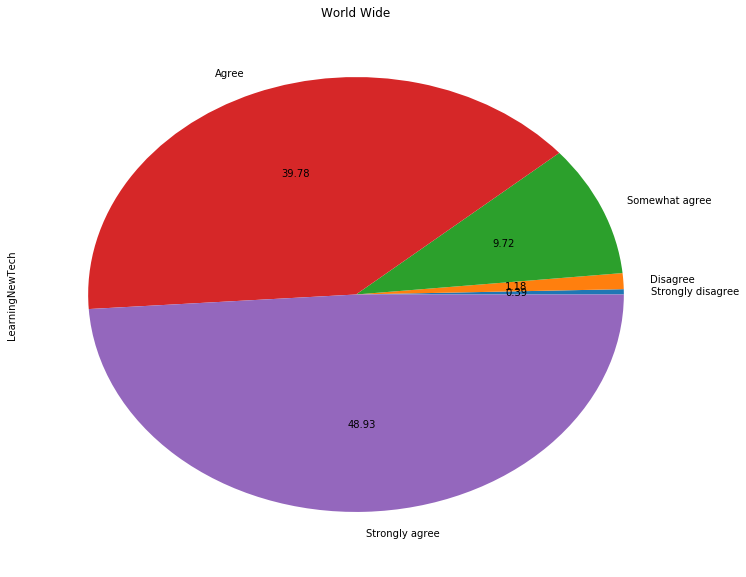

In [3]:
dataSurvey = dataSurvey[dataSurvey['LearningNewTech'].notnull()] # 31304 left

orderOfImport = ["Strongly disagree", "Disagree", "Somewhat agree", "Agree", "Strongly agree"]
dataSurvey['LearningNewTech'] = pd.Categorical(dataSurvey['LearningNewTech'], categories=orderOfImport, ordered=True)

dataSurvey['LearningNewTech'].value_counts(sort=False).plot(kind='pie',figsize=(12,10), title="World Wide", autopct='%.2f')

As can be seen from the above chart, the vast, vast majority believe learning new tech is important, with less than 1/20 th disagreeing.

In [4]:
#dataSurveyStuff = dataSurvey[(dataSurvey.LearningNewTech != 'Strongly disagree') and (dataSurvey.LearningNewTech != 'Disagree')]

dataStrongDisagree = dataSurvey.loc[(dataSurvey['LearningNewTech'] == 'Strongly disagree')]
dataDisagree = dataSurvey.loc[(dataSurvey['LearningNewTech'] == 'Disagree')]

bigdata = dataStrongDisagree.append(dataDisagree, ignore_index=True)

In [5]:
mapping = {country.name: country.alpha3 for country in pycountry.countries}
mappingDataList = []

In [6]:
for country in mapping:        
    mappingData = {'Country': country, 'Code': mapping[country], 'Total': (dataSurvey.Country == country).sum(), 
                  'Disagree' : str(len(dataSurvey[(dataSurvey['Country']== country) & (dataSurvey['LearningNewTech']=='Disagree')])),
                  'Strongly Disagree': str(len(dataSurvey[(dataSurvey['Country']== country) & (dataSurvey['LearningNewTech']=='Strongly disagree')])),
                  }
    mappingDataList.append(mappingData)

dfMap = pd.DataFrame(mappingDataList) # creating panda object 

In [7]:
dfMap['text'] = dfMap['Country'] + "<br>" + "Disagree : " + dfMap['Disagree']
dfMap['text'] = dfMap['text'] + "<br>" + "Strongly Disagree : " + dfMap['Strongly Disagree'] 

In [8]:
data = [ dict(
        type = 'choropleth',
        locations = dfMap['Code'],
        z = dfMap['Total'],
        text = dfMap['text'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Respondents<br>Thousands'),
      ) ]

layout = dict(
    title = '2017 Stackoverflow Respondents',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False)

In [9]:
bigdata.count()

Respondent                     492
Professional                   492
ProgramHobby                   492
Country                        492
University                     492
EmploymentStatus               492
FormalEducation                492
MajorUndergrad                 407
HomeRemote                     394
CompanySize                    332
CompanyType                    330
YearsProgram                   490
YearsCodedJob                  385
YearsCodedJobPast               19
DeveloperType                  327
WebDeveloperType                86
MobileDeveloperType             21
NonDeveloperType                57
CareerSatisfaction             418
JobSatisfaction                365
ExCoderReturn                   18
ExCoderNotForMe                 17
ExCoderBalance                  18
ExCoder10Years                  17
ExCoderBelonged                 19
ExCoderSkills                   19
ExCoderWillNotCode              19
ExCoderActive                   18
PronounceGIF        

In [10]:
bigdata['Salary'].describe()

count       105.000000
mean      55726.903094
std       38591.116948
min          15.000000
25%       25983.667409
50%       48190.045249
75%       89000.000000
max      160000.000000
Name: Salary, dtype: float64

Out of over 64000 respondandents, only 492 people disagree with learning new tech.

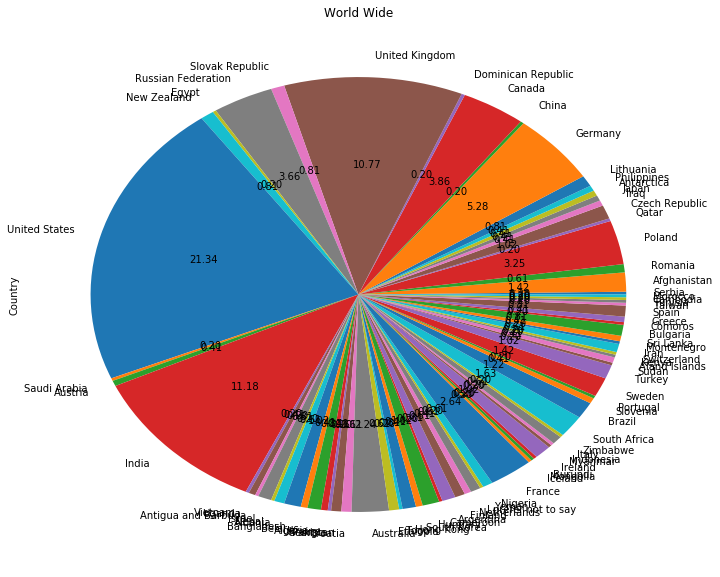

In [11]:
bigdata['Country'].value_counts(sort=False).plot(kind='pie',figsize=(12,10), title="World Wide", autopct='%.2f')

There doesn't seem to be any standouts. It seems to be fairly distributed by country depending on population.

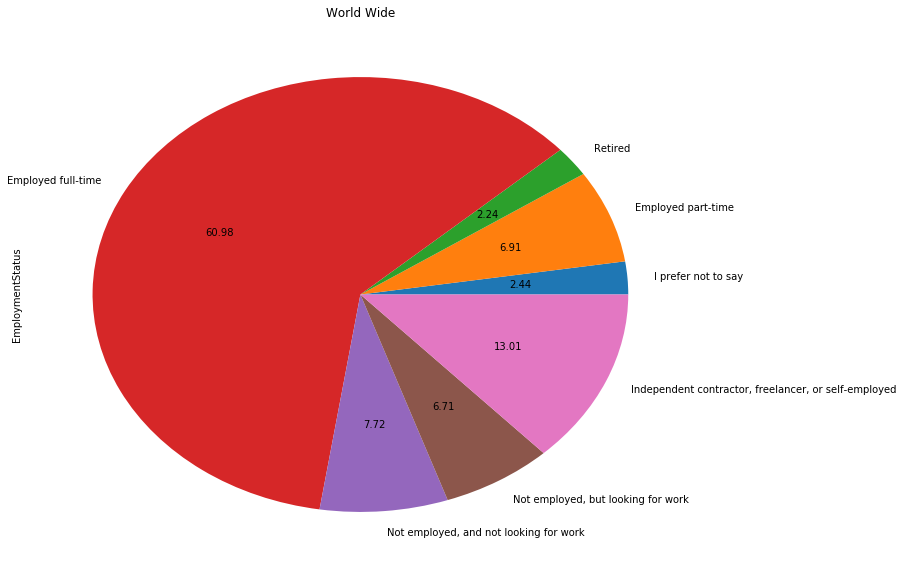

In [12]:
bigdata['EmploymentStatus'].value_counts(sort=False).plot(kind='pie',figsize=(12,10), title="World Wide", autopct='%.2f')

There seems to be the majority of people who have a job are not interested in learning new tech, with over 60 percent.

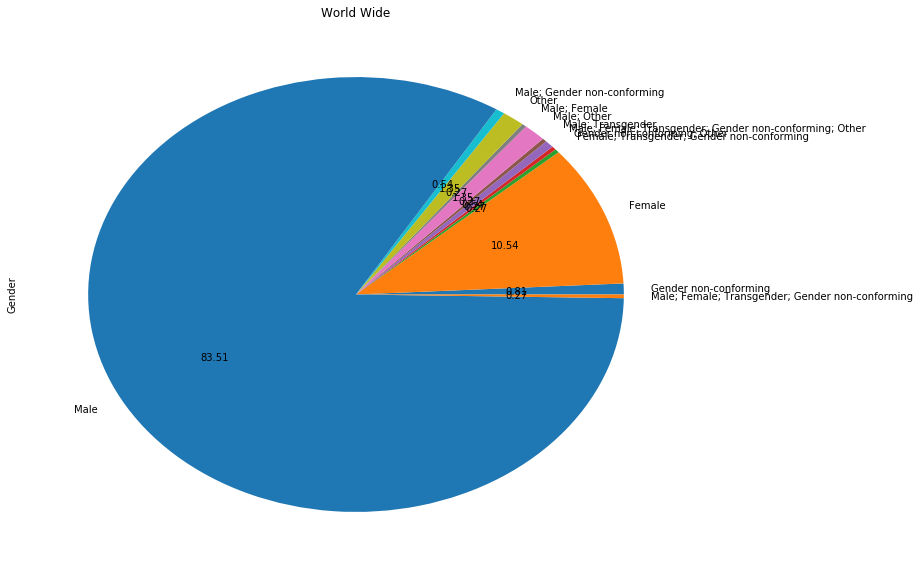

In [13]:
bigdata['Gender'].value_counts(sort=False).plot(kind='pie',figsize=(12,10), title="World Wide", autopct='%.2f')

Again, there is no suprise here, as the number of males far out way all other genders, this is to be expected.

In [14]:
orderOfImport = ['Less than a year', '1 to 2 years','2 to 3 years', '3 to 4 years',  "4 to 5 years", "5 to 6 years", '6 to 7 years', '7 to 8 years', 
 "8 to 9 years", '9 to 10 years', '10 to 11 years', '11 to 12 years', '12 to 13 years', "13 to 14 years", "14 to 15 years", 
 '15 to 16 years', "16 to 17 years", '17 to 18 years', '18 to 19 years', '19 to 20 years', '20 or more years']
bigdata['YearsProgram'] = pd.Categorical(bigdata['YearsProgram'], categories=orderOfImport, ordered=True)

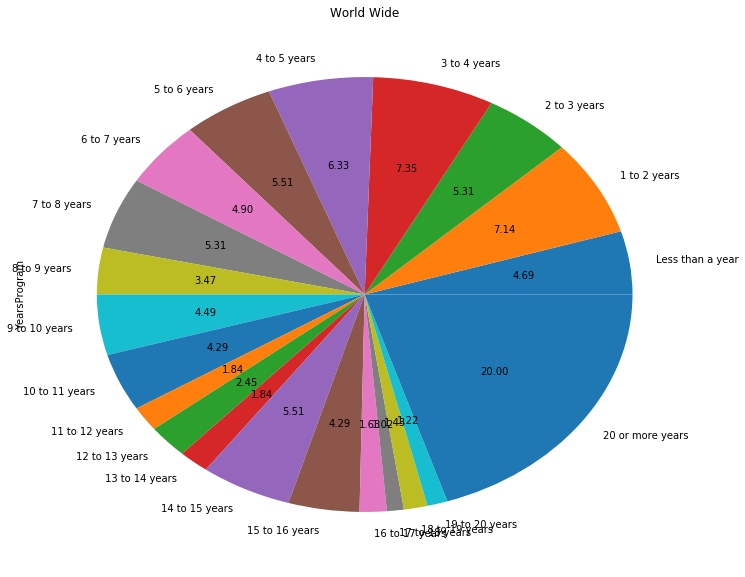

In [15]:
#bigdata['YearsProgram'].value_counts(sort=False).plot(kind='pie',figsize=(12,10), title="World Wide")
bigdata['YearsProgram'].value_counts(sort=False).plot(kind='pie',figsize=(12,10), title="World Wide", autopct='%.2f')

20 years or more seem to be against learning new tech, with nearly a quarter of all against learning new tech.

This doesn't neccerarily need to considered negative. It can be interpreted that people who have coded longer know which languages work, and have specialised. 

<h2>Linear Regression</h2>

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

import matplotlib
 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
dataSurvey = pd.read_csv('C:/Users/Thomas/Desktop/StackOverFlow/survey_results_public.csv' , encoding='utf8')

In [17]:
df1 = dataSurvey[['YearsProgram', 'LearningNewTech']]
df1 = df1[df1['YearsProgram'].notnull()]
df1 = df1[df1['LearningNewTech'].notnull()]

In [18]:
df1['YearsProgram'] = df1['YearsProgram'].replace(['Less than a year', '1 to 2 years','2 to 3 years', '3 to 4 years',  "4 to 5 years", "5 to 6 years", '6 to 7 years', '7 to 8 years', 
 "8 to 9 years", '9 to 10 years', '10 to 11 years', '11 to 12 years', '12 to 13 years', "13 to 14 years", "14 to 15 years", 
 '15 to 16 years', "16 to 17 years", '17 to 18 years', '18 to 19 years', '19 to 20 years', '20 or more years'], 
                     [0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16,17,18,19, 20]) 

df1['LearningNewTech'] = df1['LearningNewTech'].replace(['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree',
       'Strongly agree'], [0, 1, 2, 3, 4]) 

In [19]:
df1.count()

YearsProgram       31245
LearningNewTech    31245
dtype: int64

In [20]:

X = df1['YearsProgram']
Y = df1['LearningNewTech']

X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)

X_train = X[-21800:]
X_test = X[21800:]

Y_train = Y[-21800:]
Y_test = Y[21800:]

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [21]:
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

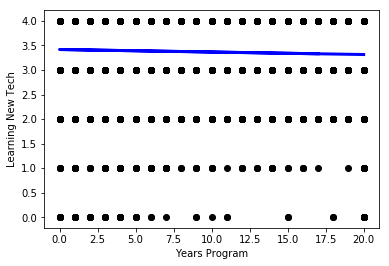

In [22]:
Y_pred = regr.predict(X_test)
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.xlabel('Years Program')
plt.ylabel('Learning New Tech')
plt.show()

In [23]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
      # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

error = np.mean(Y_pred != Y_test)
print(error)

Coefficients: 
 [[-0.00511928]]
Mean squared error: 0.56
Variance score: 0.00
1.0


When all the data is taken into account however, there is the ever so slightest downward trend.

We will now try it with employment status and see what the result is.

In [24]:
df1 = dataSurvey[['EmploymentStatus', 'LearningNewTech']]
df1 = df1[df1['EmploymentStatus'].notnull()]
df1 = df1[df1['LearningNewTech'].notnull()]
df1 = df1[df1['EmploymentStatus'] != 'I prefer not to say']

In [25]:
df1['EmploymentStatus'].unique()

array(['Not employed, and not looking for work', 'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired'], dtype=object)

In [26]:
['Not employed, but looking for work', 'Not employed, and not looking for work', 'Employed part-time'
 'Independent contractor, freelancer, or self-employed', 'Employed full-time', 'Retired'
]

['Not employed, but looking for work',
 'Not employed, and not looking for work',
 'Employed part-timeIndependent contractor, freelancer, or self-employed',
 'Employed full-time',
 'Retired']

In [27]:
df1['EmploymentStatus'] = df1['EmploymentStatus'].replace(['Not employed, but looking for work', 
                                                           'Employed part-time',
                                                           'Independent contractor, freelancer, or self-employed',
                                                           'Not employed, and not looking for work',
                                                           'Employed full-time', 'Retired'], 
                     [0, 1, 2, 3, 4,5]) 

df1['LearningNewTech'] = df1['LearningNewTech'].replace(['Strongly disagree', 'Disagree', 'Somewhat agree', 'Agree',
       'Strongly agree'], [0, 1, 2, 3, 4]) 

In [28]:
df1.count()

EmploymentStatus    30820
LearningNewTech     30820
dtype: int64

In [29]:

X = df1['EmploymentStatus']
Y = df1['LearningNewTech']

X=X.reshape(len(X),1)
Y=Y.reshape(len(Y),1)

X_train = X[-21800:]
X_test = X[21800:]

Y_train = Y[-21800:]
Y_test = Y[21800:]

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



In [30]:
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

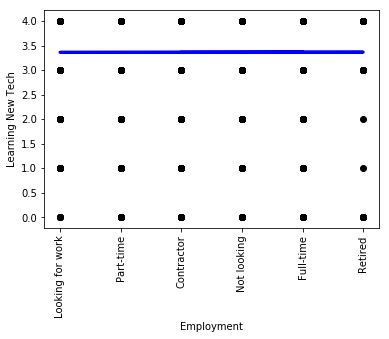

In [31]:
Y_pred = regr.predict(X_test)
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)
x = np.array([0,1, 2,3, 4, 5]) 
my_xticks = ['Looking for work','Part-time','Contractor','Not looking', 'Full-time', 'Retired']
plt.xticks(x, my_xticks)
plt.xticks(rotation=90)
plt.xlabel('Employment')
plt.ylabel('Learning New Tech')
plt.show()

In [32]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
      # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

error = np.mean(Y_pred != Y_test)
print(error)

Coefficients: 
 [[ 0.00080504]]
Mean squared error: 0.56
Variance score: -0.00
1.0


Again, little to no correlation to be found.